In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import colorsys
%matplotlib inline

In [2]:
df = pd.read_csv('news_sample.csv', sep=',')

In [13]:
%qtconsole

In [ ]:
# df = pd.read_csv('/Users/gustavoleonato/ExternalHD/ds2/news_cleaned_2018_02_13.csv')
import random

filename = '/Users/gustavoleonato/ExternalHD/ds2/news_cleaned_2018_02_13.csv'
n = sum(1 for line in open(filename)) - 1 #number of records in file (excludes header)
s = 100000 #desired sample size
skip = sorted(random.sample(range(1,n+1),n-s)) #the 0-indexed header will not be included in the skip list
df = pd.read_csv(filename, skiprows=skip)

In [11]:
df.count()

Unnamed: 0          250
id                  250
domain              250
type                238
url                 250
content             250
scraped_at          250
inserted_at         250
updated_at          250
title               250
authors             170
keywords              0
meta_keywords       250
meta_description     54
tags                 27
summary               0
dtype: int64

In [9]:
df.head()

,Unnamed: 0,id,domain,type,url,content,scraped_at,inserted_at,updated_at,title,authors,keywords,meta_keywords,meta_description,tags,summary
0,0,141,awm.com,unreliable,http://awm.com/church-congregation-brings-gift...,Sometimes the power of Christmas will make you...,2018-01-25 16:17:44.789555,2018-02-02 01:19:41.756632,2018-02-02 01:19:41.756664,Church Congregation Brings Gift to Waitresses ...,Ruth Harris,NaN,[''],NaN,NaN,NaN
1,1,256,beforeitsnews.com,fake,http://beforeitsnews.com/awakening-start-here/...,AWAKENING OF 12 STRANDS of DNA – “Reconnecting...,2018-01-25 16:17:44.789555,2018-02-02 01:19:41.756632,2018-02-02 01:19:41.756664,AWAKENING OF 12 STRANDS of DNA – “Reconnecting...,Zurich Times,NaN,[''],NaN,NaN,NaN
2,2,700,cnnnext.com,unreliable,http://www.cnnnext.com/video/18526/never-hike-...,Never Hike Alone: A Friday the 13th Fan Film U...,2018-01-25 16:17:44.789555,2018-02-02 01:19:41.756632,2018-02-02 01:19:41.756664,Never Hike Alone - A Friday the 13th Fan Film ...,NaN,NaN,[''],Never Hike Alone: A Friday the 13th Fan Film ...,NaN,NaN
3,3,768,awm.com,unreliable,http://awm.com/elusive-alien-of-the-sea-caught...,"When a rare shark was caught, scientists were ...",2018-01-25 16:17:44.789555,2018-02-02 01:19:41.756632,2018-02-02 01:19:41.756664,Elusive ‘Alien Of The Sea ‘ Caught By Scientis...,Alexander Smith,NaN,[''],NaN,NaN,NaN
4,4,791,bipartisanreport.com,clickbait,http://bipartisanreport.com/2018/01/21/trumps-...,Donald Trump has the unnerving ability to abil...,2018-01-25 16:17:44.789555,2018-02-02 01:19:41.756632,2018-02-02 01:19:41.756664,Trump’s Genius Poll Is Complete & The Results ...,Gloria Christie,NaN,[''],NaN,NaN,NaN


In [10]:
# Verifica os nulos no Dataframe

df.apply(lambda x: sum(x.isnull()))

Unnamed: 0            0
id                    0
domain                0
type                 12
url                   0
content               0
scraped_at            0
inserted_at           0
updated_at            0
title                 0
authors              80
keywords            250
meta_keywords         0
meta_description    196
tags                223
summary             250
dtype: int64

In [14]:
df.columns

Index(['Unnamed: 0', 'id', 'domain', 'type', 'url', 'content', 'scraped_at',
       'inserted_at', 'updated_at', 'title', 'authors', 'keywords',
       'meta_keywords', 'meta_description', 'tags', 'summary'],
      dtype='object')

### Análise da qualidade do preenchimento da informação por Categoria da notícia

In [6]:
# Quantidade de Registros
df['type'].describe()

count      238
unique      10
top       fake
freq       155
Name: type, dtype: object

#### percebe-se que há 13 tipos distintos de categorias

In [11]:
# Quantidade de categorias não preenchidas
df['type'].isna().sum()

0

### Quantificando cada uma das 13 Categorias

In [12]:
df['type'].value_counts()

fake          236
unknown       168
bias          134
conspiracy    122
satire        109
political      65
unreliable     56
clickbait      35
junksci        32
hate           29
rumor          11
reliable        3
state           1
Name: type, dtype: int64

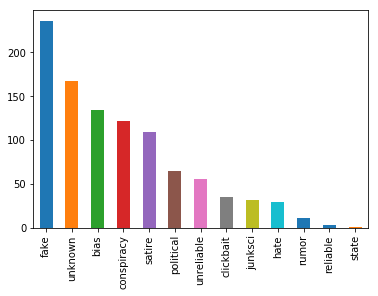

In [13]:
# Gráfico de Barras simples
df['type'].value_counts().plot.bar()

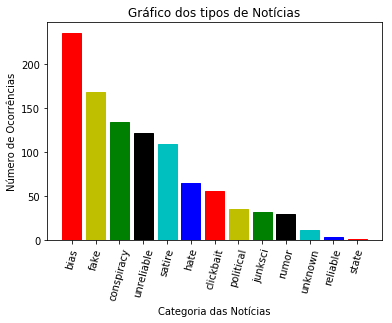

In [21]:
index = np.arange(len(df['type'].unique()))
b = plt.bar(index, df['type'].value_counts())   
b[0].set_color('r')
b[1].set_color('y')
b[2].set_color('g')
b[3].set_color('k')
b[4].set_color('c')
b[5].set_color('b')
b[6].set_color('r')
b[7].set_color('y')
b[8].set_color('g')
b[9].set_color('k')
b[10].set_color('c')
b[11].set_color('b')
b[12].set_color('r')
plt.xticks(index, df['type'].unique(), rotation=75)
plt.title('Gráfico dos tipos de Notícias')
plt.xlabel('Tipo de Notícia')
plt.ylabel('Número de Ocorrências')
plt.show()

In [23]:
index = np.arange(len(df['type'].unique()))
print(index)

[ 0  1  2  3  4  5  6  7  8  9 10 11 12]


#### Pelo Gráfico acima percebe-se que a maioria absoluta dos dados são sobre Política, seguidos de Sociedade e Cotidiano e de Tv e Celebridades

/anaconda3/lib/python3.7/site-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


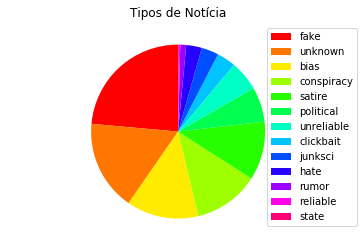

In [25]:
# Definindo a quantidade
labels = df.type.value_counts().index

# Contabilizando os elementos por cada um dos labels
num = len(df.type.value_counts().index)

# Criando a lista de cores
listaHSV = [(x*1.0/num, 1.0, 1.0) for x in range(num)]
listaRGB = list(map(lambda x: colorsys.hsv_to_rgb(*x), listaHSV))

# Gráfico de Pizza
fatias, texto = plt.pie(df.type.value_counts(), colors=listaRGB, startangle=90)
plt.axes().set_aspect('equal', 'datalim')
plt.legend(fatias, labels, bbox_to_anchor = (1.05,1))
plt.title('Tipos de Notícia')
plt.show()

#### Pelo gráfico de pizza acima é possível ver que os tipos de noticia classificadas como FAKE representam quase 25% do dataset

### Quais os números de Tokens das Notícias?

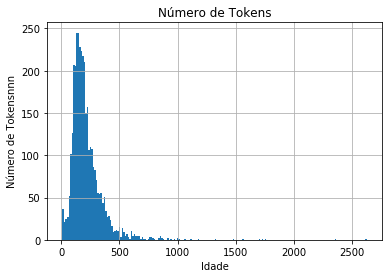

In [25]:
# gerando um histograma
df.number_of_tokens.hist(bins=200)
plt.xlabel('Idade')
plt.ylabel('Número de Tokensnnn')
plt.title('Número de Tokens')
plt.show()

#### Através do histograma acima é possível visualizar que a grande parte do número de tokens nas notícias ficam entre 50 e 400 tokens, aproximadamente, com o maior pico de dados na região entre 100 e 150 tokens

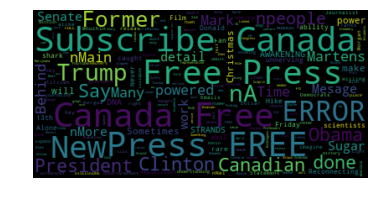

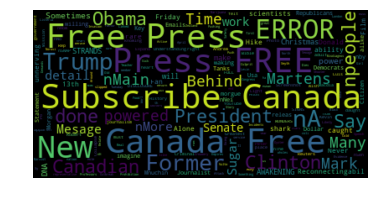

In [10]:
import os
from os import path
from wordcloud import WordCloud

# get data directory (using getcwd() is needed to support running example in generated IPython notebook)
# d = path.dirname(__file__) if "__file__" in locals() else os.getcwd()

# Read the whole text.
# text = open(path.join(d, 'constitution.txt')).read()
text = str(df['content'])

# Generate a word cloud image
wordcloud = WordCloud().generate(text)

# Display the generated image:
# the matplotlib way:
# import matplotlib.pyplot as plt
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")

# lower max_font_size
wordcloud = WordCloud(max_font_size=40,width=400, height=200).generate(text)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()
wordcloud.to_file('wordcloud.jpg')

# The pil way (if you don't have matplotlib)
# image = wordcloud.to_image()
# image.show()